Epoch [100/999], Loss: 0.0191
Epoch [200/999], Loss: 0.0079
Epoch [300/999], Loss: 0.0033
Epoch [400/999], Loss: 0.0019
Epoch [500/999], Loss: 0.0015
Epoch [600/999], Loss: 0.0014
Epoch [700/999], Loss: 0.0013
Epoch [800/999], Loss: 0.0017
Epoch [900/999], Loss: 0.0013


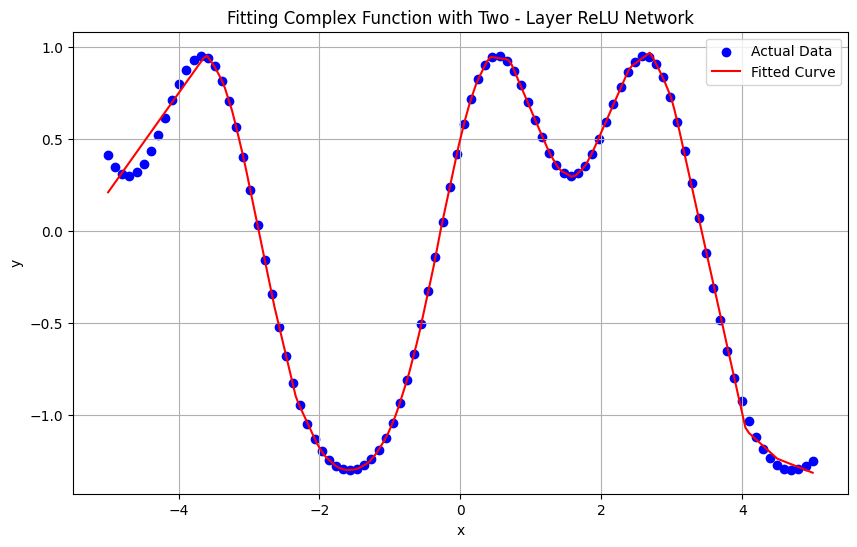

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 定义复杂函数
def complex_function(x):
    return np.sin(x) + 0.5 * np.cos(2 * x) + 0.2 * np.sin(3 * x)

# 生成训练数据
x_train = torch.linspace(-5, 5, 100).view(-1, 1)
y_train = torch.tensor(complex_function(x_train.numpy()), dtype=torch.float32).view(-1, 1)

# 定义两层 ReLU 神经网络模型
class TwoLayerReLU(nn.Module):
    def __init__(self):
        super(TwoLayerReLU, self).__init__()
        self.fc1 = nn.Linear(1, 50)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(50, 50)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x


# 初始化模型、损失函数和优化器
model = TwoLayerReLU()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 666
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# 生成测试数据
x_test = torch.linspace(-5, 5, 200).view(-1, 1)
y_test = torch.tensor(complex_function(x_test.numpy()), dtype=torch.float32).view(-1, 1)

# 进行预测
with torch.no_grad():
    y_pred = model(x_test)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.scatter(x_train.numpy(), y_train.numpy(), label='Actual Data', color='blue')
plt.plot(x_test.numpy(), y_pred.numpy(), label='Fitted Curve', color='red')
plt.title('Fitting Complex Function with Two - Layer ReLU Network')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
    